In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.patches import Circle, Wedge
import seaborn as sns
from matplotlib.animation import FuncAnimation

import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
from field_map_g4bl import readFieldMapData
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '../../..'))
sys.path.append(parent_dir)
from functions.set_plot_settings import setPlotSettings
setPlotSettings(font=True)
from functions.read_g4bl_data import readTraceData

# Animation directory:
ani_dir = 'animations/'

In [2]:
# Read in field map data:
data = readFieldMapData('fieldmap.txt')

In [3]:
# Solenoid inner radius (mm):
a = 420

# Solenoid outer radius (mm):
b = 600

# Number of periods in sim:
nperiods = 3

# Number of solenoids in sim:
nsolenoids = nperiods*6

In [4]:
# Define function to plot solenoid cross-section:
def plot_solenoid(ax):
    circle_inner = plt.Circle([0,0], radius=a, fill=False, linestyle='-', color='white')
    ax.add_patch(circle_inner)
    circle_outer = plt.Circle([0,0], radius=b, fill=False, linestyle='-', color='white')
    ax.add_patch(circle_outer)
    fill = Wedge(center=(0, 0), r=b, theta1=0, theta2=360, width=b - a, color='white', label='Solenoid', alpha=0.8)
    ax.add_patch(fill)
    plt.legend(loc='upper right')

# Define function to plot solenoids along z:
def plot_lattice(ax):
    for i in range(nsolenoids):
        zshift = 700*i
        ax.axvspan(xmin=-150+zshift, xmax=150+zshift, color='gray', alpha=0.2)

### Plot transverse slice at given z

In [5]:
z_val = 0.0

data_slice = data[data['z'] == z_val]

x_unique = np.sort(data_slice['x'].unique())
y_unique = np.sort(data_slice['y'].unique())
X, Y = np.meshgrid(x_unique, y_unique)

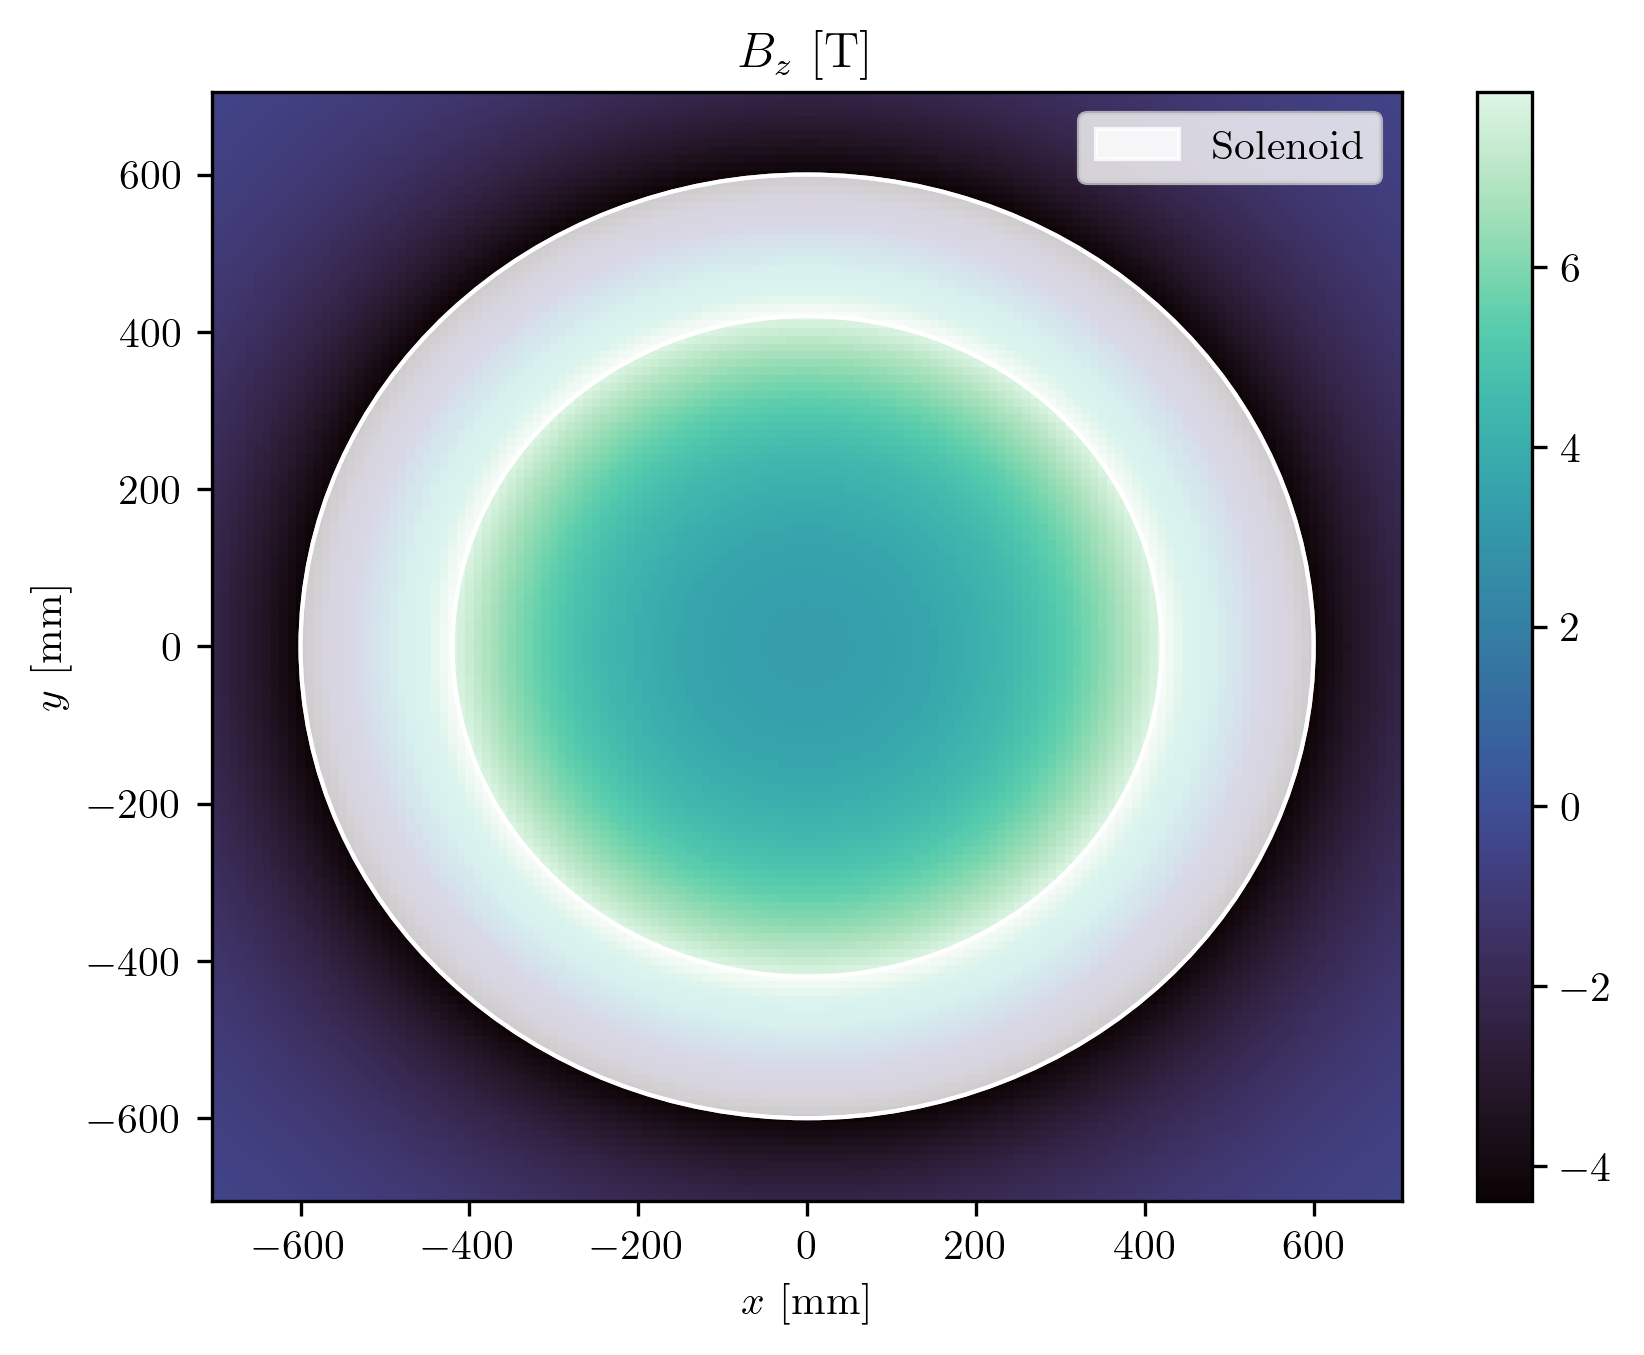

In [6]:
########## B_z ##########

Bz_pivot = data_slice.pivot_table(index='y', columns='x', values='Bz' )
Bz_grid = Bz_pivot.values

fig, ax = plt.subplots()
cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Bz_grid, cmap=cmap, shading='auto', vmin=data_slice['Bz'].min(), vmax=data_slice['Bz'].max())
plt.colorbar(pcm)
plot_solenoid(ax)
plt.xlabel('$x$ [mm]')
plt.ylabel('$y$ [mm]')
plt.title('$B_z$ [T]')
plt.show()

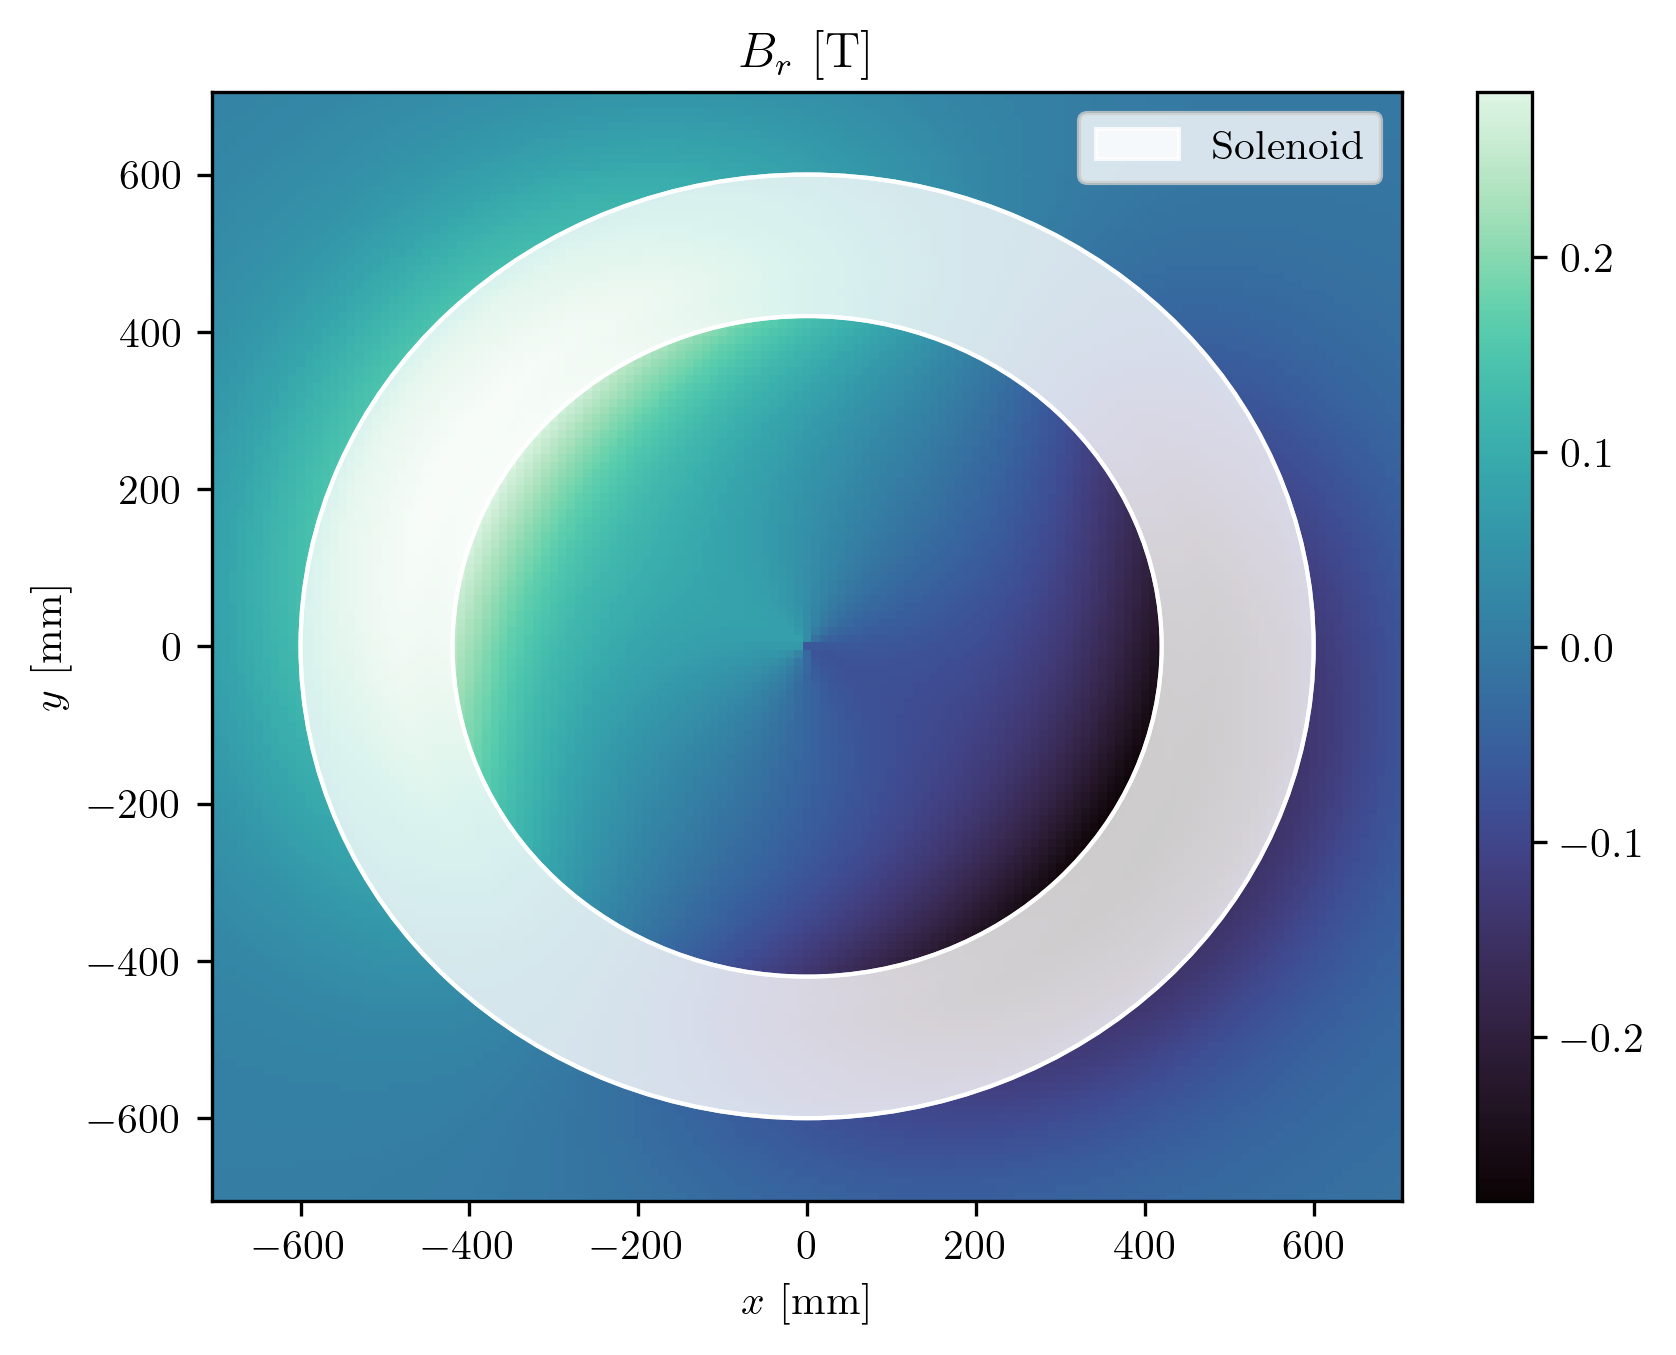

In [7]:
########## B_r ##########

Br_pivot = data_slice.pivot_table(index='y', columns='x', values='Br' )
Br_grid = Br_pivot.values

fig, ax = plt.subplots()
cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Br_grid, cmap=cmap, shading='auto', vmin=data_slice['Br'].min(), vmax=data_slice['Br'].max())
plt.colorbar(pcm)
plot_solenoid(ax)
plt.xlabel('$x$ [mm]')
plt.ylabel('$y$ [mm]')
plt.title('$B_r$ [T]')
plt.show()

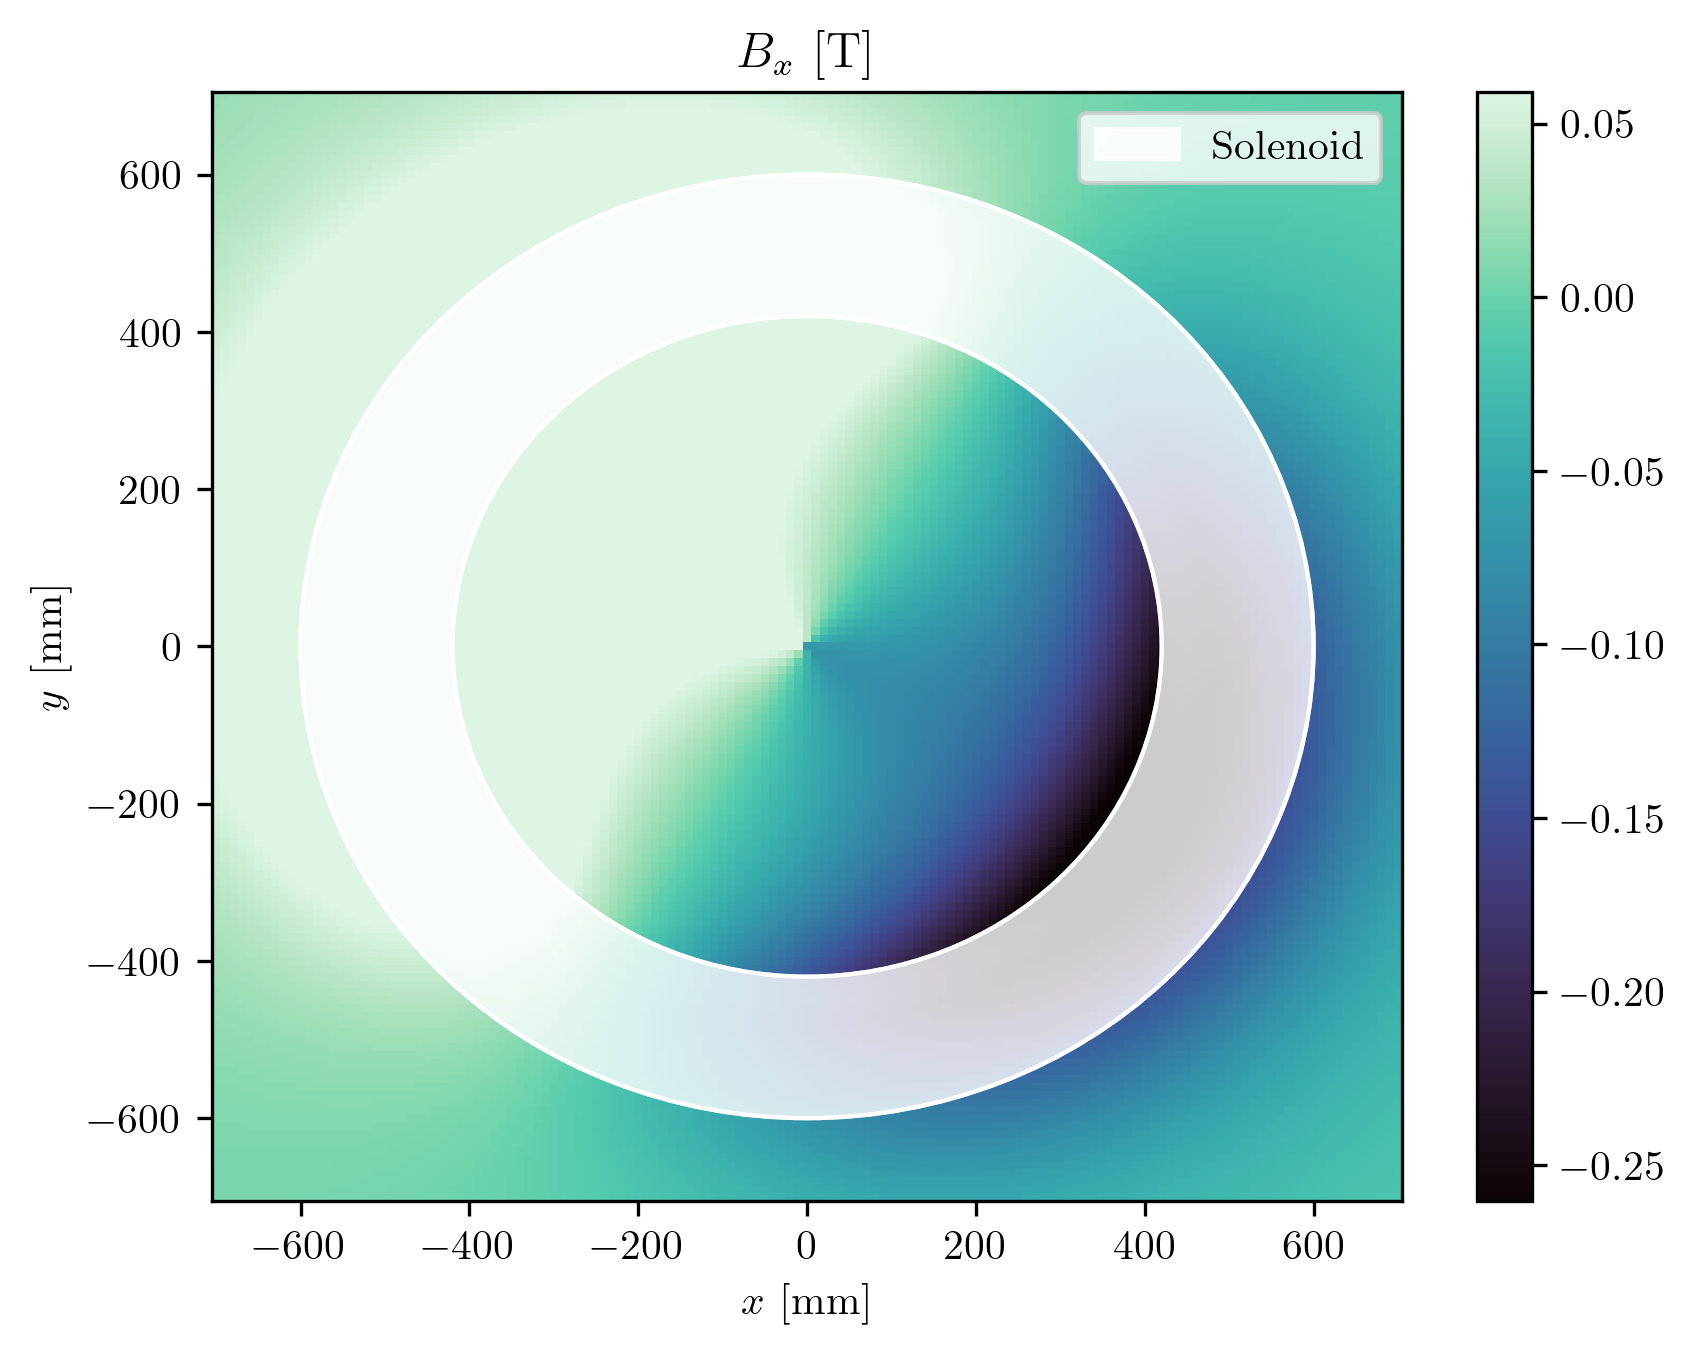

In [8]:
########## B_x ##########

Bx_pivot = data_slice.pivot_table(index='y', columns='x', values='Bx' )
Bx_grid = Br_pivot.values

fig, ax = plt.subplots()
cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Bx_grid, cmap=cmap, shading='auto', vmin=data_slice['Bx'].min(), vmax=data_slice['Bx'].max())
plt.colorbar(pcm)
plot_solenoid(ax)
plt.xlabel('$x$ [mm]')
plt.ylabel('$y$ [mm]')
plt.title('$B_x$ [T]')
plt.show()

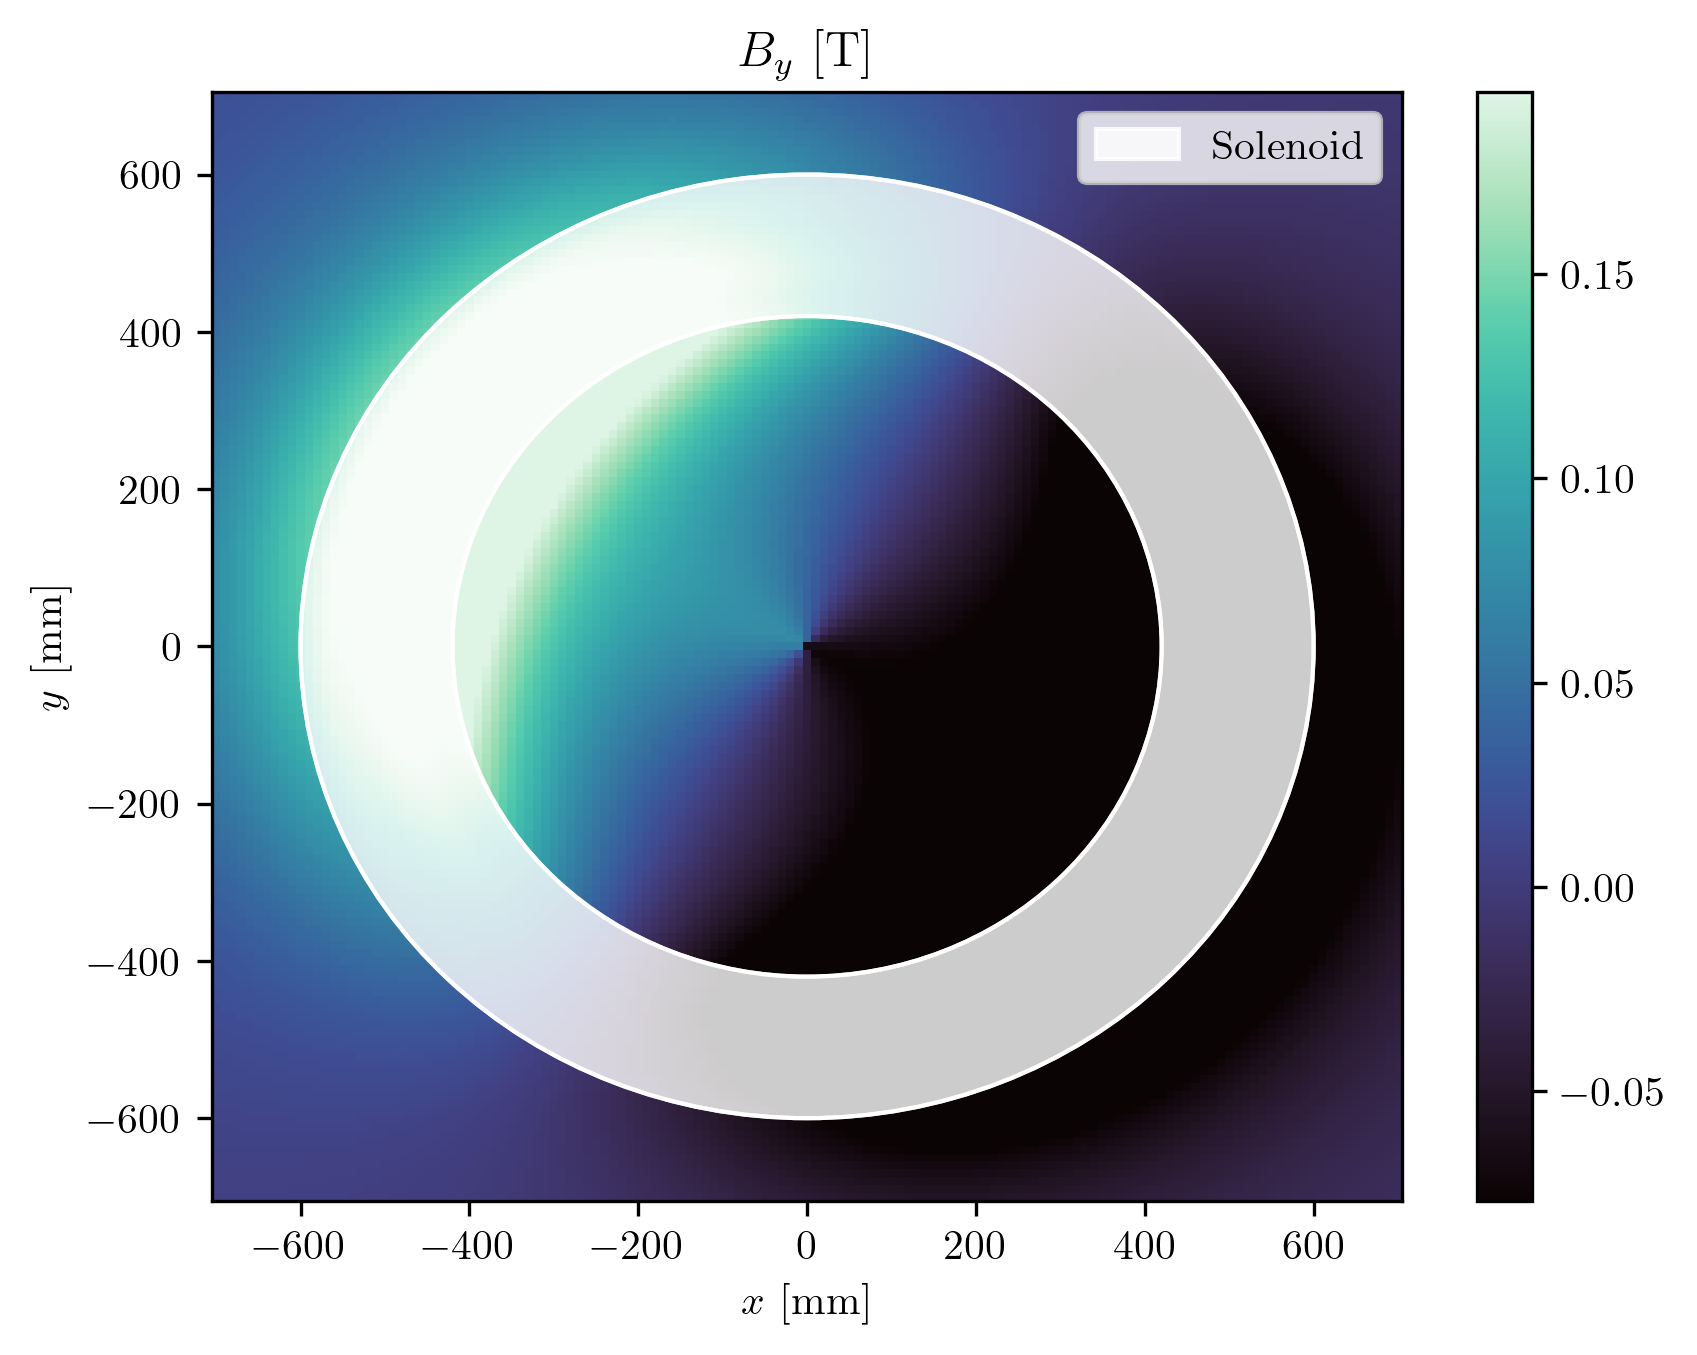

In [9]:
########## B_y ##########

By_pivot = data_slice.pivot_table(index='y', columns='x', values='By' )
By_grid = Br_pivot.values

fig, ax = plt.subplots()
cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, By_grid, cmap=cmap, shading='auto', vmin=data_slice['By'].min(), vmax=data_slice['By'].max())
plt.colorbar(pcm)
plot_solenoid(ax)
plt.xlabel('$x$ [mm]')
plt.ylabel('$y$ [mm]')
plt.title('$B_y$ [T]')
plt.show()

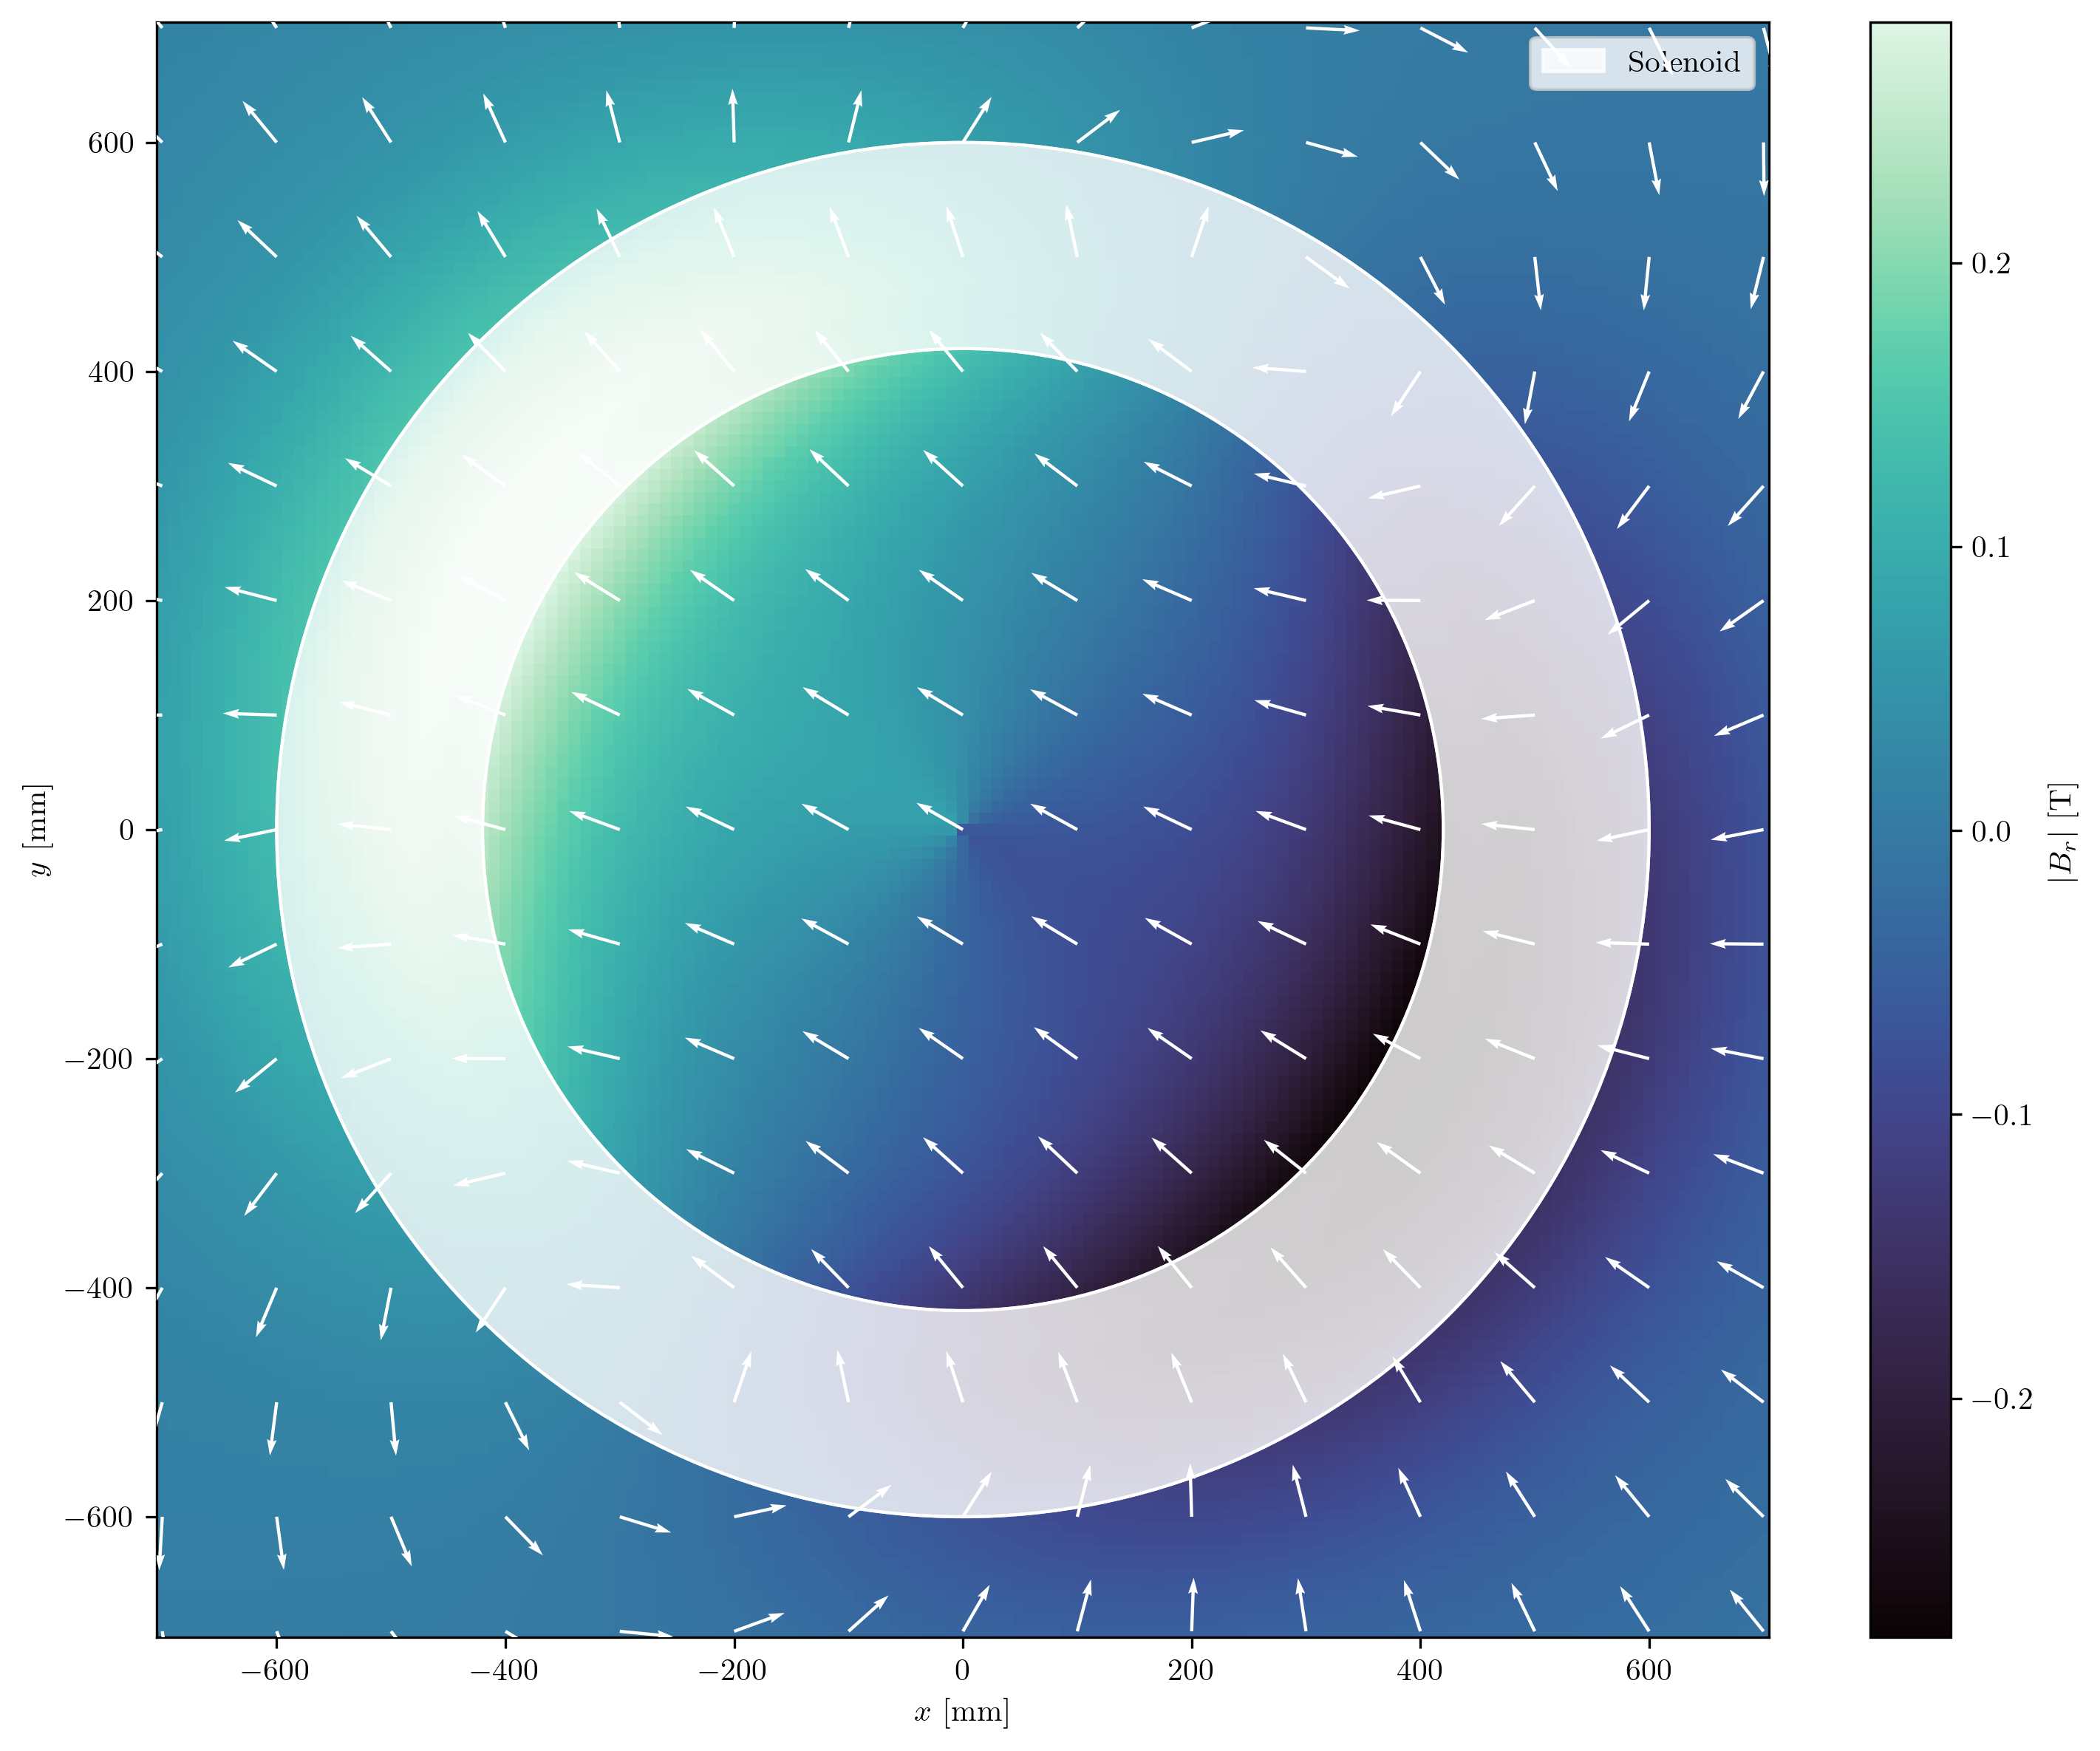

In [10]:
########## VECTOR PLOT OF TRANSVERSE FIELD ##########

Bx_grid = data_slice.pivot_table(index='y', columns='x', values='Bx').values
By_grid = data_slice.pivot_table(index='y', columns='x', values='By').values

step = 10
X_ds = X[::step, ::step]
Y_ds = Y[::step, ::step]
Bx_ds = Bx_grid[::step, ::step]
By_ds = By_grid[::step, ::step]

magnitude = np.sqrt(Bx_ds**2 + By_ds**2)
Bx_norm = Bx_ds / (magnitude + 1e-12)
By_norm = By_ds / (magnitude + 1e-12)

fig, ax = plt.subplots(figsize=(10, 8))
cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Br_grid, cmap=cmap, shading='auto', vmin=data_slice['Br'].min(), vmax=data_slice['Br'].max())
plt.colorbar(pcm, ax=ax, label='$|B_r|$ [T]')

ax.quiver(X_ds, Y_ds, Bx_norm, By_norm, color='white', scale=30, width=0.002, zorder=10)

plot_solenoid(ax)

ax.set_xlabel('$x$ [mm]')
ax.set_ylabel('$y$ [mm]')
plt.tight_layout()
plt.show()

### Animated field map for transverse slice along z

In [11]:
unique_z = np.sort(data['z'].unique())
init_data = data[data['z'] == unique_z[0]]
x_unique = np.sort(init_data['x'].unique())
y_unique = np.sort(init_data['y'].unique())
X, Y = np.meshgrid(x_unique, y_unique)

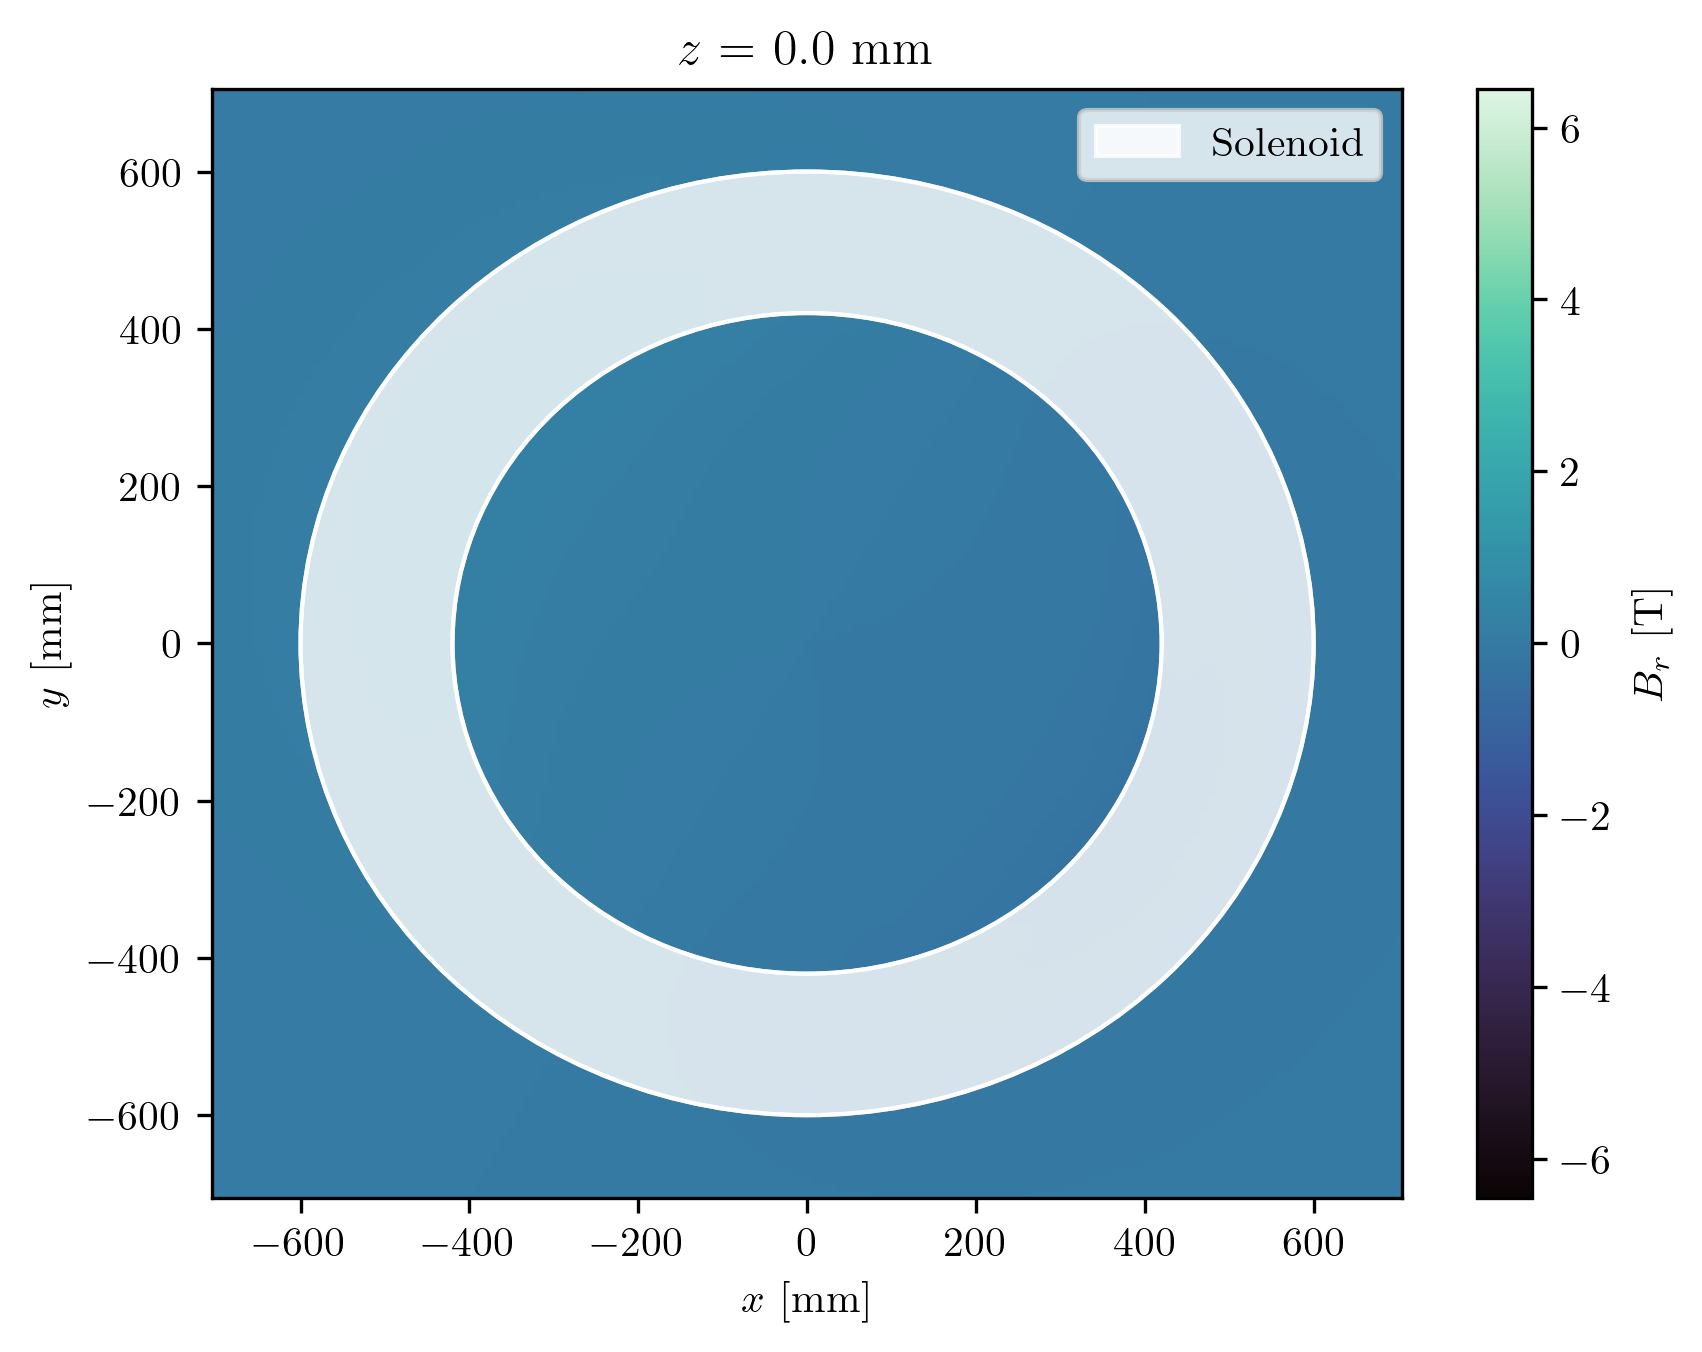

In [12]:
########## B_r ##########

Br_init = init_data.pivot_table(index='y', columns='x', values='Br').values

fig, ax = plt.subplots()
ax.set_xlabel('$x$ [mm]')
ax.set_ylabel('$y$ [mm]')
cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Br_init, cmap=cmap, shading='auto', vmin=data['Br'].min(), vmax=data['Br'].max())
cbar = plt.colorbar(pcm, ax=ax, label='$B_r$ [T]')
plot_solenoid(ax)

def animate(frame):

    ax.set_title(f'$z$ = {unique_z[frame]} mm')

    data_slice = data[data['z'] == unique_z[frame]]
    Br_grid = data_slice.pivot_table(index='y', columns='x', values='Br').values
    pcm.set_array(Br_grid.ravel())
    return [pcm]

animation = FuncAnimation(fig, animate, frames=len(unique_z), interval=100, blit=False, repeat=True)
animation.save(ani_dir+'Br_g4bl.gif', writer='pillow')

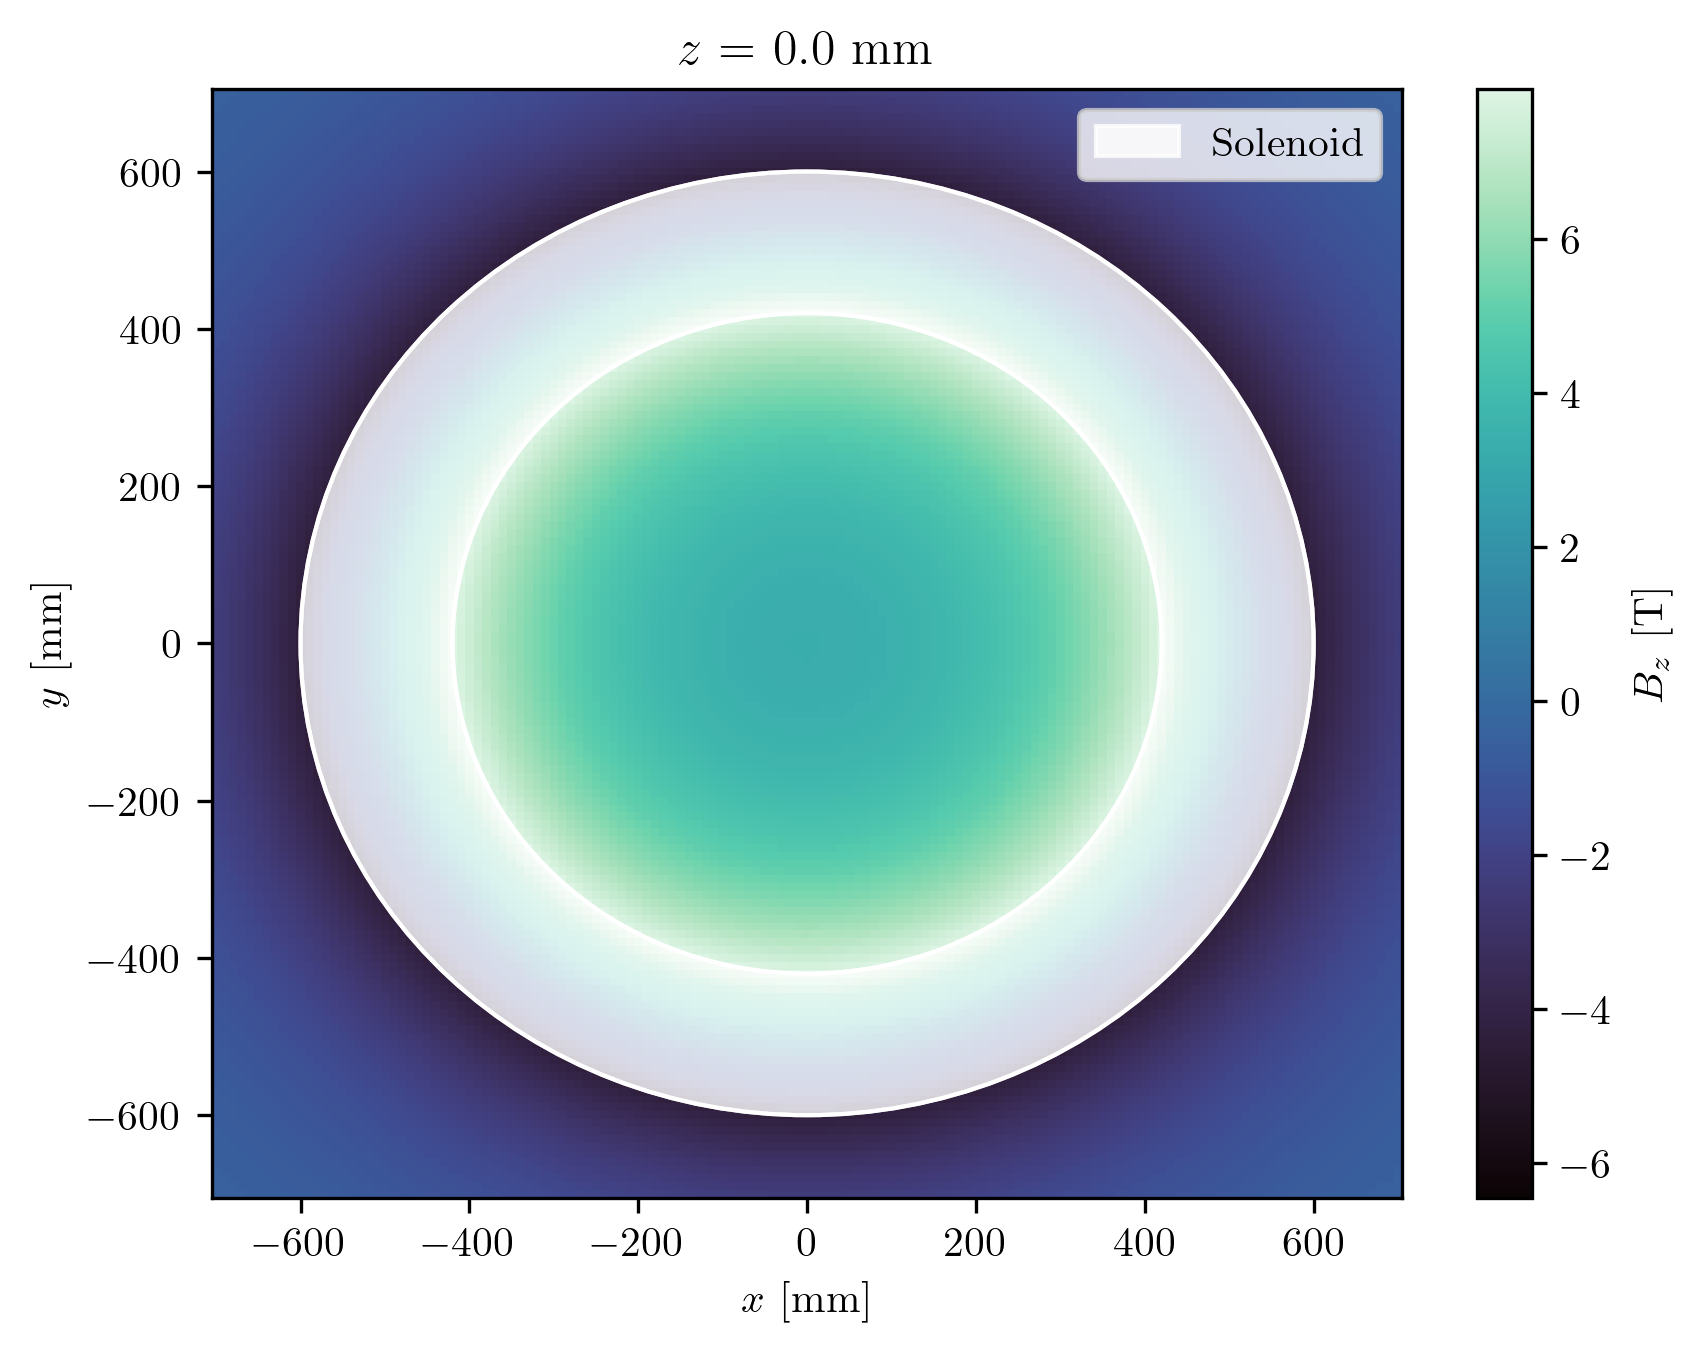

In [13]:
########## B_z ##########

Bz_init = init_data.pivot_table(index='y', columns='x', values='Bz').values

fig, ax = plt.subplots()
ax.set_xlabel('$x$ [mm]')
ax.set_ylabel('$y$ [mm]')
cmap = sns.color_palette("mako", as_cmap=True)
pcm = ax.pcolormesh(X, Y, Bz_init, cmap=cmap, shading='auto', vmin=data['Br'].min(), vmax=data['Bz'].max())
cbar = plt.colorbar(pcm, ax=ax, label='$B_z$ [T]')
plot_solenoid(ax)

def animate(frame):

    ax.set_title(f'$z$ = {unique_z[frame]} mm')

    data_slice = data[data['z'] == unique_z[frame]]
    Bz_grid = data_slice.pivot_table(index='y', columns='x', values='Bz').values
    pcm.set_array(Bz_grid.ravel())
    return [pcm]

animation = FuncAnimation(fig, animate, frames=len(unique_z), interval=100, blit=False, repeat=True)
animation.save(ani_dir+'Bz_g4bl.gif', writer='pillow')